In [8]:
import pandas as pd
import numpy as np
import geopandas as gpd
import joblib
import os
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [2]:
PUB_SPRF = joblib.load('PUB_SPRF.pkl')

In [4]:
# doing more predictions
static_atts_3539 = pd.read_csv(os.path.join(os.getcwd(), 'Data', 'crb_nhgf_static_inputs.csv'))
static_atts_3539['predicted_performance'] = PUB_SPRF.predict(static_atts_3539.iloc[:,1:]) # prediction
prediction_prob_of_each_class = PUB_SPRF.predict_proba(static_atts_3539.iloc[:,1:-1])
static_atts_3539['AM_prob'] = prediction_prob_of_each_class[:,0]   # above median prediction prob
static_atts_3539['BM_prob'] = prediction_prob_of_each_class[:,1]    # below median prediction prob

# adding a column about the probabilty of the predictions
static_atts_3539['prob_confidence'] = static_atts_3539.apply(lambda row: 'Likely Above Median' if row['AM_prob'] > 0.65 
                          else ('Likely Below Median' if row['BM_prob'] > 0.65 else 'Uncertain'), 
                          axis=1)

C:\Users\adadkhah\AppData\Local\Temp\ipykernel_33348\3557522615.py:19: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  shapefile_with_predicted_performance.to_file('CRB_shapefiles_with_PUB_projected_LSTM_performance_with_damindex.shp', driver='ESRI Shapefile')


In [ ]:
# adding predicted performance class to the shapefile
shapefile_with_predicted_performance = pd.merge(gpd.read_file(os.path.join(os.getcwd(), 'Data', 'Basins_shapefile', 'CO_catchments_GF1_1.shp')),
         static_atts_3539[['nhgf_id', 'Dam_Index', 'predicted_performance','AM_prob','BM_prob','prob_confidence']],
         left_on='seg_id_nhm',
         right_on='nhgf_id')

shapefile_with_predicted_performance.to_file('CRB_shapefiles_with_PUB_projected_LSTM_performance_with_damindex.shp', driver='ESRI Shapefile')

### upper CRB

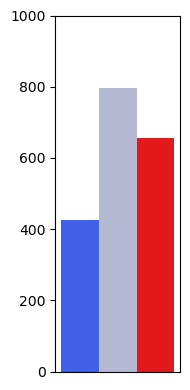

In [12]:
#static_atts_3539.plot(kind='bar', x='prob_confidence', y='Values', legend=False)
# Count the occurrences of each category
Upper_ungaged = shapefile_with_predicted_performance[shapefile_with_predicted_performance['nhgf_id']<44663]
Reg_Upper_ungaged = Upper_ungaged[Upper_ungaged['Dam_Index']>0.1]
category_counts = Upper_ungaged['prob_confidence'].value_counts()
Reg_category_counts = Reg_Upper_ungaged['prob_confidence'].value_counts()

# Define colors and order for the bars
colors=['#4160ea', '#b3b9d2', '#e31a1c']
order = ['Likely Above Median', 'Uncertain', 'Likely Below Median']  # Custom order

# Plotting the bar plot
category_counts = category_counts.reindex(order)
# Plotting the bar plot with no space between the bars and custom figure size
fig, ax = plt.subplots(figsize=(2, 4))  # Change figure size here
bars = ax.bar(category_counts.index, category_counts.values, color=colors, width=1, edgecolor='none')  # Change bar width here
#plt.bar(Reg_category_counts.index, Reg_category_counts.values, color='white', edgecolor='red', hatch='/', width=1, ax=ax)

# Adding custom legend
#plt.legend(bars.patches, category_counts.index, title='Projected model performance')
plt.xlabel('')
plt.ylabel('')
plt.title('')
# Remove x-ticks
plt.ylim((0.0, 1000))
plt.xticks([])
plt.tight_layout()
plt.savefig('UpperCRB_PUB_SPRF_gagecounts_updated.png', dpi=300, transparent=True)
plt.show()

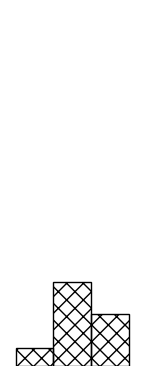

In [13]:
Reg_Upper_ungaged = Upper_ungaged[Upper_ungaged['Dam_Index']>0.05]
category_counts = Reg_Upper_ungaged['prob_confidence'].value_counts()

# Define colors and order for the bars
colors=['royalblue', 'darkorange', 'violet']
order = ['Likely Above Median', 'Uncertain','Likely Below Median']  # Custom order

# Plotting the bar plot
category_counts = category_counts.reindex(order)
# Plotting the bar plot with no space between the bars and custom figure size
fig, ax = plt.subplots(figsize=(2, 4))  # Change figure size here
bars = ax.bar(category_counts.index, category_counts.values, facecolor="none", color='white', edgecolor='Black', hatch='XX', width=1)  # Change bar width here


# Adding custom legend
#plt.legend(bars.patches, category_counts.index, title='Projected model performance')
plt.xlabel('')
plt.ylabel('')
plt.title('')
# Remove x-ticks
plt.ylim((0.0, 1000))
plt.xticks([])
plt.tight_layout()
plt.axis('off')
plt.savefig('UpperCRB_PUB_SPRF_gagecounts_Reg_updated.png', dpi=300, transparent=True)

plt.show()

### Lower CRB

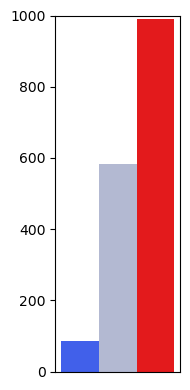

In [15]:
#static_atts_3539.plot(kind='bar', x='prob_confidence', y='Values', legend=False)
# Count the occurrences of each category
Lower_ungaged = shapefile_with_predicted_performance[shapefile_with_predicted_performance['nhgf_id']>=44663]

category_counts = Lower_ungaged['prob_confidence'].value_counts()

# Define colors and order for the bars
colors=['#4160ea', '#b3b9d2', '#e31a1c']
order = ['Likely Above Median', 'Uncertain', 'Likely Below Median']  # Custom order

# Plotting the bar plot
category_counts = category_counts.reindex(order)
# Plotting the bar plot with no space between the bars and custom figure size
fig, ax = plt.subplots(figsize=(2, 4))  # Change figure size here
bars = ax.bar(category_counts.index, category_counts.values, color=colors, width=1, edgecolor='none')  # Change bar width here
#plt.bar(Reg_category_counts.index, Reg_category_counts.values, color='white', edgecolor='red', hatch='/', width=1, ax=ax)

# Adding custom legend
#plt.legend(bars.patches, category_counts.index, title='Projected model performance')
plt.xlabel('')
plt.ylabel('')
plt.title('')
# Remove x-ticks
plt.ylim((0.0, 1000))
plt.xticks([])
plt.tight_layout()
plt.savefig('LowerCRB_PUB_SPRF_gagecounts_updated.png', dpi=300, transparent=True)
plt.show()

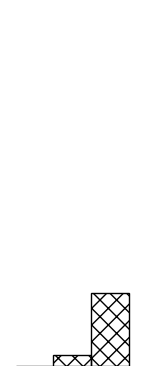

In [22]:
Reg_Lower_ungaged = Lower_ungaged[Lower_ungaged['Dam_Index']>0.05]
category_counts = Reg_Lower_ungaged['prob_confidence'].value_counts()

# Define colors and order for the bars
colors=['royalblue', 'darkorange', 'violet']
order = ['Likely Above Median', 'Uncertain','Likely Below Median']  # Custom order

# Plotting the bar plot
category_counts = category_counts.reindex(order)
category_counts['Likely Above Median']= 0
# Plotting the bar plot with no space between the bars and custom figure size
fig, ax = plt.subplots(figsize=(2, 4))  # Change figure size here
bars = ax.bar(category_counts.index, category_counts.values, facecolor="none", color='white', edgecolor='Black', hatch='XX', width=1)  # Change bar width here


# Adding custom legend
#plt.legend(bars.patches, category_counts.index, title='Projected model performance')
plt.xlabel('')
plt.ylabel('')
plt.title('')
# Remove x-ticks
plt.ylim((0.0, 1000))
plt.xticks([])
plt.tight_layout()
plt.axis('off')
plt.savefig('LowerCRB_PUB_SPRF_gagecounts_Reg_updated.png', dpi=300, transparent=True)

plt.show()